# ICAN clinical data simualtion 

**Objective:** sharing synthetic data in the context of the ICAN project to reproduce methods and graphics used in the paper.

In this notebook, we generate random values with probability distribtions close to the real ICAN dataset.

## Packages importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

## Clinical data simulation

In [2]:
FEATURES = ["sex", "age", "bmi", "sporadic_case", "multiple_IA", "IA_location", "adjusted_IA_size", 
            "tobacco", "alcohol", "hta", "headaches", "diabetes", "dyslipidemia", "ischemic_stroke_history", 
            "ischemic_heart_disease_history", "pad_history", "carotid_artery_stenosis_history", "aortic_aneurysm_history", 
            "statin_ttt", "platelet_aggregation_inhibiting_ttt", "vka_or_anticoagulant_ttt", "anti_inflammatory_ttt", 
            "hormone_therapy_ttt", "allergy", "asthma", "atopy", "eczema", "rupture"] 

In [3]:
def yes_no_var(percentage_yes, nb_samples) :
    return np.random.choice(['Yes', 'No'], nb_samples, p=[percentage_yes, 1-percentage_yes])

In [4]:
np.random.seed(111)
df = pd.DataFrame()
nb_samples = 2505
nb_choice = 5000

for f in FEATURES :
    if 'sex' in f:
        df[f] = np.random.choice(['M', 'F'], nb_samples, p=[0.28, 0.72])
    
    if 'age' in f:
        select_indiv = []
        random_nb = np.random.normal(loc = 53.6, scale = 12.3, size = nb_choice).astype(int)
        random_nb2 = random_nb[np.where((random_nb >=18)&(random_nb <= 87))]
        df[f] = df[f] = np.random.choice(random_nb2, size = nb_samples)
    if 'bmi' in f:
        select_indiv = []
        random_nb = np.random.normal(loc = 25.4, scale = 4.8, size = nb_choice).round(decimals = 1)
        random_nb2 = random_nb[np.where((random_nb >=15.6)&(random_nb <= 54.8))]
        df[f] = np.random.choice(random_nb2, size = nb_samples)
    if 'sporadic_case' in f:
        df[f] = yes_no_var(0.82, nb_samples)
    
    if 'multiple_IA' in f:
        df[f] = yes_no_var(0.32, nb_samples)
        
    if 'IA_location' in f:
        df[f] = np.random.choice(['ICA', 'MCA', 'ACA', 'PCA'], nb_samples, p=[0.25, 0.26, 0.30, 0.19])
        
    if 'adjusted_IA_size' in f:
        select_indiv = []
        random_nb = np.abs(skewnorm.rvs(a = 2.27, loc = 0, scale = 1.29, size = nb_choice)).round(decimals = 2)
        random_nb2 = random_nb[np.where(random_nb >=0.25)]
        size_ICA = np.random.choice(random_nb2, size = len(df[df["IA_location"] == "ICA"]))

        select_indiv = []
        random_nb = np.abs(skewnorm.rvs(a = 2.88, loc = 0, scale = 1.44, size = nb_choice)).round(decimals = 2)
        random_nb2 = random_nb[np.where(random_nb >=0.33)]
        size_MCA = np.random.choice(random_nb2, size = len(df[df["IA_location"] == "MCA"]))

        select_indiv = []
        random_nb = np.abs(skewnorm.rvs(a = 7.5, loc = 1, scale = 4.04, size = nb_choice)).round(decimals = 2)
        random_nb2 = random_nb[np.where(random_nb >=1)]
        size_ACA = np.random.choice(random_nb2, size = len(df[df["IA_location"] == "ACA"]))

        select_indiv = []
        random_nb = np.abs(skewnorm.rvs(a = 2.34, loc = 2, scale = 3.56, size = nb_choice)).round(decimals = 2)
        random_nb2 = random_nb[np.where(random_nb >=0.66)]
        size_PCA = np.random.choice(random_nb2, size = len(df[df["IA_location"] == "PCA"]))

        size = np.repeat(-1.11, 2505)
        size[df[df["IA_location"] == "ICA"].index] = size_ICA
        size[df[df["IA_location"] == "MCA"].index] = size_MCA
        size[df[df["IA_location"] == "ACA"].index] = size_ACA
        size[df[df["IA_location"] == "PCA"].index] = size_PCA
        df[f] = size
    
    if 'tobacco' in f:
        df[f] = np.random.choice(['Non-smoker', 'Little_smoker', 'Regular_smoker'], nb_samples, p=[0.29, 0.44, 0.27])
    
    if 'alcohol' in f:
        df[f] = np.random.choice(['< 150g', '> 150g'], nb_samples, p=[0.88, 0.12])
    
    if 'hta' in f:
        df[f] = yes_no_var(0.37, nb_samples)
        
    if 'headaches' in f:
        df_atcd1 = df[df["hta"] == "Yes"]
        atcd1 = yes_no_var(0.13, len(df_atcd1))
        
        df_atcd_other = df.drop(df_atcd1.index, axis = 0)
        atcd_other = yes_no_var(0.19, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
    if 'diabetes' in f:
        df_atcd1 = df[df["hta"] == "Yes"]
        atcd1 = yes_no_var(0.08, len(df_atcd1))
        
        df_atcd_other = df.drop(df_atcd1.index, axis = 0)
        atcd_other = yes_no_var(0.02, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
    if 'dyslipidemia' in f:
        df_atcd1 = df[df["hta"] == "Yes"]
        atcd1 = yes_no_var(0.36, len(df_atcd1))
        
        df_atcd2_dep = df.drop(df_atcd1.index, axis = 0)
        df_atcd2 = df_atcd2_dep[df_atcd2_dep["headaches"] == "Yes"]
        atcd2 = yes_no_var(0.1, len(df_atcd2))
        
        df_atcd3_dep = df_atcd2_dep.drop(df_atcd2.index, axis = 0)
        df_atcd3 = df_atcd3_dep[df_atcd3_dep["headaches"] == "Yes"]
        atcd3 = yes_no_var(0.1, len(df_atcd3))
        
        df_atcd_other = df_atcd3_dep.drop(df_atcd3.index, axis = 0)
        atcd_other = yes_no_var(0.16, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd2.index] = atcd2
        atcd[df_atcd3.index] = atcd3
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
    
    if "ischemic_stroke_history" in f:
        df_atcd1 = df[df["dyslipidemia"] == "Yes"]
        atcd1 = yes_no_var(0.16, len(df_atcd1))
        
        df_atcd_other = df.drop(df_atcd1.index, axis = 0)
        atcd_other = yes_no_var(0.05, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
        df[f] = yes_no_var(0.07, nb_samples)
        
    if "ischemic_heart_disease_history" in f:
        df_atcd1 = df[df["ischemic_stroke_history"] == "Yes"]
        atcd1 = yes_no_var(0.11, len(df_atcd1))
        
        df_atcd2_dep = df.drop(df_atcd1.index, axis = 0)
        df_atcd2 = df_atcd2_dep[df_atcd2_dep["dyslipidemia"] == "Yes"]
        atcd2 = yes_no_var(0.07, len(df_atcd2))
        
        df_atcd_other = df_atcd2_dep.drop(df_atcd2.index, axis = 0)
        atcd_other = yes_no_var(0.014, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd2.index] = atcd2
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
    if "pad_history" in f:
        df_atcd1 = df[df["ischemic_heart_disease_history"] == "Yes"]
        atcd1 = yes_no_var(0.19, len(df_atcd1))
        
        df_atcd_other = df.drop(df_atcd1.index, axis = 0)
        atcd_other = yes_no_var(0.016, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
    if "carotid_artery_stenosis_history" in f:
        df[f] = yes_no_var(0.03, nb_samples)
        
    if "aortic_aneurysm_history" in f:
        df[f] = yes_no_var(0.005, nb_samples)
        
    if "statin_ttt" in f:
        df_ttt1 = df[(df["dyslipidemia"] == "Yes") | (df["ischemic_heart_disease_history"] == "Yes")]
        ttt1 = yes_no_var(0.59, len(df_ttt1))
        
        df_ttt2_dep = df.drop(df_ttt1.index, axis = 0)
        df_ttt2 = df_ttt2_dep[df_ttt2_dep["ischemic_stroke_history"] == "Yes"]
        ttt2 = yes_no_var(0.09, len(df_ttt2))
        
        df_ttt_other = df_ttt2_dep.drop(df_ttt2.index, axis = 0)
        ttt_other = yes_no_var(0.014, len(df_ttt_other))
        
        ttt = np.repeat("NaN", 2505)
        ttt[df_ttt1.index] = ttt1
        ttt[df_ttt2.index] = ttt2
        ttt[df_ttt_other.index] = ttt_other
        df[f] = ttt
    
    if "platelet_aggregation_inhibiting_ttt" in f:
        df_ttt1 = df[df["ischemic_heart_disease_history"] == "Yes"]
        ttt1 = yes_no_var(0.72, len(df_ttt1))
        
        df_ttt2_dep = df.drop(df_ttt1.index, axis = 0)
        df_ttt2 = df_ttt2_dep[df_ttt2_dep["pad_history"] == "Yes"]
        ttt2 = yes_no_var(0.54, len(df_ttt2))
        
        df_ttt3_dep = df_ttt2_dep.drop(df_ttt2.index, axis = 0)
        df_ttt3 = df_ttt3_dep[df_ttt3_dep["ischemic_stroke_history"] == "Yes"]
        ttt3 = yes_no_var(0.48, len(df_ttt3))
        
        df_ttt4_dep = df_ttt3_dep.drop(df_ttt3.index, axis = 0)
        df_ttt4 = df_ttt4_dep[df_ttt4_dep["carotid_artery_stenosis_history"] == "Yes"]
        ttt4 = yes_no_var(0.36, len(df_ttt4))
        
        df_ttt5_dep = df_ttt4_dep.drop(df_ttt4.index, axis = 0)
        df_ttt5 = df_ttt5_dep[df_ttt5_dep["dyslipidemia"] == "Yes"]
        ttt5 = yes_no_var(0.17, len(df_ttt5))
        
        df_ttt_other = df_ttt5_dep.drop(df_ttt5.index, axis = 0)
        ttt_other = yes_no_var(0.058, len(df_ttt_other))
        
        ttt = np.repeat("NaN", 2505)
        ttt[df_ttt1.index] = ttt1
        ttt[df_ttt2.index] = ttt2
        ttt[df_ttt3.index] = ttt3
        ttt[df_ttt4.index] = ttt4
        ttt[df_ttt5.index] = ttt5
        ttt[df_ttt_other.index] = ttt_other
        df[f] = ttt
        
    if "vka_or_anticoagulant_ttt" in f:
        df_ttt1 = df[df["aortic_aneurysm_history"] == "Yes"]
        ttt1 = yes_no_var(0.33, len(df_ttt1))
        
        df_ttt2_dep = df.drop(df_ttt1.index, axis = 0)
        df_ttt2 = df_ttt2_dep[df_ttt2_dep["ischemic_stroke_history"] == "Yes"]
        ttt2 = yes_no_var(0.09, len(df_ttt2))
        
        df_ttt_other = df_ttt2_dep.drop(df_ttt2.index, axis = 0)
        ttt_other = yes_no_var(0.023, len(df_ttt_other))
        
        ttt = np.repeat("NaN", 2505)
        ttt[df_ttt1.index] = ttt1
        ttt[df_ttt2.index] = ttt2
        ttt[df_ttt_other.index] = ttt_other
        df[f] = ttt
        
    if "anti_inflammatory_ttt" in f:
        df[f] = yes_no_var(0.03, nb_samples)
        
    if "hormone_therapy_ttt" in f:
        df[f] = yes_no_var(0.03, nb_samples)
        
    if "allergy" in f:
        df[f] = yes_no_var(0.23, nb_samples)
        
    if "asthma" in f:
        df_atcd1 = df[df["allergy"] == "Yes"]
        atcd1 = yes_no_var(0.17, len(df_atcd1))
        
        df_atcd_other = df.drop(df_atcd1.index, axis = 0)
        atcd_other = yes_no_var(0.04, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
    if "atopy" in f:
        df_atcd1 = df[df["allergy"] == "Yes"]
        atcd1 = yes_no_var(0.14, len(df_atcd1))
        
        df_atcd_other = df.drop(df_atcd1.index, axis = 0)
        atcd_other = yes_no_var(0.03, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
    if "eczema" in f:
        df_atcd1 = df[df["allergy"] == "Yes"]
        atcd1 = yes_no_var(0.13, len(df_atcd1))
        
        df_atcd2_dep = df.drop(df_atcd1.index, axis = 0)
        df_atcd2 = df_atcd2_dep[df_atcd2_dep["asthma"] == "Yes"]
        atcd2 = yes_no_var(0.1, len(df_atcd2))
        
        df_atcd3_dep = df_atcd2_dep.drop(df_atcd2.index, axis = 0)
        df_atcd3 = df_atcd3_dep[df_atcd3_dep["atopy"] == "Yes"]
        atcd3 = yes_no_var(0.1, len(df_atcd3))
        
        df_atcd_other = df_atcd3_dep.drop(df_atcd3.index, axis = 0)
        atcd_other = yes_no_var(0.037, len(df_atcd_other))
        
        atcd = np.repeat("NaN", 2505)
        atcd[df_atcd1.index] = atcd1
        atcd[df_atcd2.index] = atcd2
        atcd[df_atcd3.index] = atcd3
        atcd[df_atcd_other.index] = atcd_other
        df[f] = atcd
        
    if "rupture" in f:
        df[f] = yes_no_var(0.397, nb_samples)

In [5]:
def label_PHASES(row):
    """Implementation of PHASES score.
    Necessary variables : hta, age, IA_size, IA_location.
    Returning a value between 0 and 16.
    
    Parameters
    ----------
    row: row of a DataFrame
    
    Indication
    ----------
    df.apply(lambda row : label_PHASES(row), axis = 1)
    df: Dataframe ican
    """
    score = 0
    
    # There are no Japanese or Finnish patient in the ICAN database => score(Population) = 0
    
    # Hypertension
    if row['hta'] == "Oui" :
        score += 1
        
    # Age
    if str(row['age']) != "nan" :
        age = row['age']
        if float(row['age']) >= 70.0 :
            score += 1
    else:
        print("ISSUE with age during PHASES scoring")
        print(row["patient"])
    
    # Size of aneurysm
    size = float(row['adjusted_IA_size'])
    if str(size) != "nan" :
        if size < 7.0 :
            score += 0
        elif size < 10.0 :
            score += 3
        elif size < 20.0:
            score += 6
        else:
            score += 10
    
    # Earlier SAH from another aneurysm is not given in the ICAN dataset
    
    # Site of aneurysm
    site = row['IA_location']
    if site in ['MCA']:
        score += 2
    elif site in ['ACA', 'PCA']:
        score += 4

    return score

In [6]:
df["PHASES_score"] = df.apply(lambda row : label_PHASES(row), axis = 1)

## Export to a tabular CSV file

In [7]:
df.to_csv('simulated_ican_clinical_data.csv', encoding='utf8', sep = "#", index = False)   

## Histogram examples

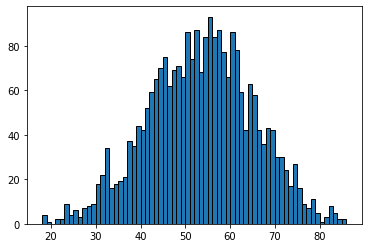

In [8]:
plt.hist(df["age"], edgecolor = "black", bins = np.arange(18, 87));

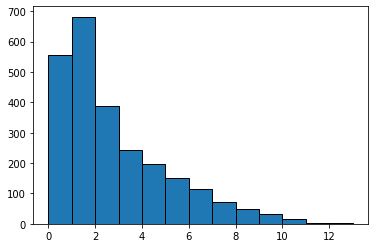

In [9]:
plt.hist(df["adjusted_IA_size"], edgecolor = "black", bins = np.arange(0, 14));